In [1]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np

url = 'https://www.worldometers.info/population/countries-in-africa-by-population/'
whole_page = requests.get(url)
doc = lh.fromstring(whole_page.content)

tr_elements = doc.xpath('//tr')
[len(T) for T in tr_elements[:12]]

tr_elements = doc.xpath('//tr')

cols = []
i = 0

for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    cols.append((name,[]))

1:#
2:Country (or dependency)
3:Population (2020)
4:Yearly Change
5:Net Change
6:Density (P/Km²)
7:Land Area (Km²)
8:Migrants (net)
9:Fert. Rate
10:Med. Age
11:Urban Pop %
12:World Share


In [2]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row

    if len(T)!=12: #if row is not size 3, //tr data is not from the table.
        break

    i = 0 #i is the index of the first column

    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()

        cols[i][1].append(data) #append the data to the empty list of the i'th column

        i+=1


[len(C) for (title,C) in cols]
Dict = {title:column for (title,column) in cols}
df = pd.DataFrame(Dict)
df

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,Nigeria,"206,139,589",2.58 %,"5,175,990",226,"910,770","-60,000",5.4,18,52 %,2.64 %
1,2,Ethiopia,"114,963,588",2.57 %,"2,884,858",115,"1,000,000","30,000",4.3,19,21 %,1.47 %
2,3,Egypt,"102,334,404",1.94 %,"1,946,331",103,"995,450","-38,033",3.3,25,43 %,1.31 %
3,4,DR Congo,"89,561,403",3.19 %,"2,770,836",40,"2,267,050","23,861",6.0,17,46 %,1.15 %
4,5,South Africa,"59,308,690",1.28 %,"750,420",49,"1,213,090","145,405",2.4,28,67 %,0.76 %
5,6,Tanzania,"59,734,218",2.98 %,"1,728,755",67,"885,800","-40,076",4.9,18,37 %,0.77 %
6,7,Kenya,"53,771,296",2.28 %,"1,197,323",94,"569,140","-10,000",3.5,20,28 %,0.69 %
7,8,Uganda,"45,741,007",3.32 %,"1,471,413",229,"199,810","168,694",5.0,17,26 %,0.59 %
8,9,Algeria,"43,851,044",1.85 %,"797,990",18,"2,381,740","-10,000",3.1,29,73 %,0.56 %
9,10,Sudan,"43,849,260",2.42 %,"1,036,022",25,"1,765,048","-50,000",4.4,20,35 %,0.56 %


<h1>Question Two</h1>
<h2>Clean the data set</h2>

In [3]:
cols = ['#']
df = df.drop(columns=cols)
df['Population (2020)'] = df['Population (2020)'].str.strip()
df['Yearly Change'] = df['Yearly Change'].str.strip()
df['Net Change'] =df['Net Change'].str.strip()
df['Density (P/Km²)'] = df['Density (P/Km²)'].str.strip()
df['Land Area (Km²)'] = df['Land Area (Km²)'].str.strip()
df['Migrants (net)'] = df['Migrants (net)'].str.strip()
df['Fert. Rate'] = df['Fert. Rate'].str.strip()
df['Med. Age'] = df['Med. Age'].str.strip()
df['Urban Pop %'] = df['Urban Pop %'].str.strip()
df['World Share'] = df['World Share'].str.strip()

df['Population (2020)'] = df['Population (2020)'].str.replace(r",","")
df['Yearly Change'] = df['Yearly Change'].str.replace(r"%","")
df['Net Change'] =df['Net Change'].str.replace(r",","")
df['Land Area (Km²)'] = df['Land Area (Km²)'].str.replace(r",","")
df['Migrants (net)'] = df['Migrants (net)'].str.replace(r",","")
df['Urban Pop %'] = df['Urban Pop %'].str.replace(r"%","")
df['World Share'] = df['World Share'].str.replace(r"%","")

df = df.iloc[:-1 , :]
df['Population (2020)'] = pd.to_numeric(df['Population (2020)'])
df['Yearly Change'] = pd.to_numeric(df['Yearly Change'])
df['Net Change'] = pd.to_numeric(df['Net Change'])
df['Density (P/Km²)'] = pd.to_numeric( df['Density (P/Km²)'])
df['Land Area (Km²)'] = pd.to_numeric(df['Land Area (Km²)'])
df['Migrants (net)'] = pd.to_numeric(df['Migrants (net)'])
df['Fert. Rate'] = pd.to_numeric(df['Fert. Rate'])
df['Med. Age'] = pd.to_numeric(df['Med. Age'])
df['Urban Pop %'] = pd.to_numeric(df['Urban Pop %'])
df['World Share'] = pd.to_numeric(df['World Share'])


df

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Nigeria,206139589,2.58,5175990,226,910770,-60000,5.4,18,52,2.64
1,Ethiopia,114963588,2.57,2884858,115,1000000,30000,4.3,19,21,1.47
2,Egypt,102334404,1.94,1946331,103,995450,-38033,3.3,25,43,1.31
3,DR Congo,89561403,3.19,2770836,40,2267050,23861,6.0,17,46,1.15
4,South Africa,59308690,1.28,750420,49,1213090,145405,2.4,28,67,0.76
5,Tanzania,59734218,2.98,1728755,67,885800,-40076,4.9,18,37,0.77
6,Kenya,53771296,2.28,1197323,94,569140,-10000,3.5,20,28,0.69
7,Uganda,45741007,3.32,1471413,229,199810,168694,5.0,17,26,0.59
8,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73,0.56
9,Sudan,43849260,2.42,1036022,25,1765048,-50000,4.4,20,35,0.56


<h2>Write one line of code that can produce the Figure (1a). </h2>

In [4]:
df.describe()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,5.700000e+01,57.000000,5.700000e+01,57.000000,5.700000e+01,57.000000,57.00000,57.000000,57.000000,57.000000
mean,2.351916e+07,2.245439,5.707708e+05,120.807018,5.201419e+05,-8123.684211,4.14386,21.456140,49.280702,0.301579
std,3.523594e+07,0.806015,8.876490e+05,159.430509,5.860162e+05,44731.829430,1.17352,5.203262,19.792454,0.451370
min,9.834700e+04,0.170000,6.080000e+02,2.000000,3.750000e+02,-174200.000000,1.40000,15.000000,14.000000,0.000000
25%,2.351627e+06,1.780000,4.793000e+04,25.000000,3.036000e+04,-10047.000000,3.30000,18.000000,37.000000,0.030000
50%,1.212320e+07,2.450000,3.220490e+05,67.000000,2.736000e+05,-4000.000000,4.40000,19.000000,46.000000,0.160000
75%,2.769102e+07,2.830000,6.694830e+05,137.000000,8.232900e+05,0.000000,4.80000,23.000000,64.000000,0.360000
max,2.061396e+08,3.840000,5.175990e+06,728.000000,2.381740e+06,168694.000000,7.00000,37.000000,100.000000,2.640000


<h2> Also, write lines of code that can produce the Figure (1b) and use it to answer questions </h2>

<AxesSubplot:>

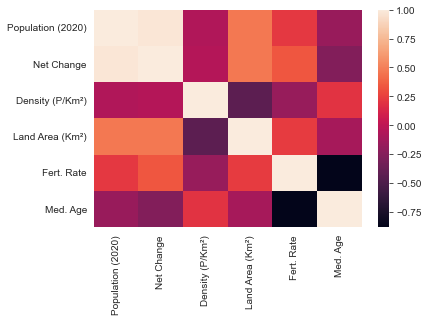

In [5]:
import seaborn as sns
df1 = df.drop(columns=['Yearly Change','Migrants (net)','Urban Pop %','World Share'])
sns.heatmap(df1.corr())

<h2>Explain the meanings of the different color seen in the figure. (5 marks)</h2>

In [6]:
df1.corr()

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Fert. Rate,Med. Age
Population (2020),1.000000,0.977566,-0.059794,0.467881,0.213526,-0.163998
Net Change,0.977566,1.000000,-0.050533,0.466928,0.332917,-0.261840
Density (P/Km²),-0.059794,-0.050533,1.000000,-0.428253,-0.173157,0.190764
Land Area (Km²),0.467881,0.466928,-0.428253,1.000000,0.229461,-0.105542
Fert. Rate,0.213526,0.332917,-0.173157,0.229461,1.000000,-0.883598
Med. Age,-0.163998,-0.261840,0.190764,-0.105542,-0.883598,1.000000


the different colors show the correlations between the data elements

<h1> Question Six </h1>
<h2> Match the following statements with each of these words: Deterministic Systems,
Unsupervised learning, Neural Network, Supervise learning, Probabilistic Systems,
Regression, Reinforcement learning </h2>

i)Supervise Learning

II)Unsupervised learning

III) Regression

IV) Deterministic Systems

V) Probabilistic Systems

VI) Reinforcement learning

VII) Neural Network

<h2> ) Question Six (b)</h2>
<h3> Compute the weighted sum of the inputs, z_1,1, at the first node of the hidden layer. </h3>

In [7]:
x1= 0.5
x2= 0.85
w1 =0.98
w2= 0.88
w3= 0.97
w4= 0.51
w5= 0.97
w6= 0.99
b11=0.94
b12= 0.56
b2 = 0.05

z_11 = (x1 * w1) + (x2 * w2) + b11
z_11

2.178

In [8]:
z_12 = (x1 * w3) + (x2 * w4) + b12
z_12

1.4785

In [9]:
a_11 = 1.0 / (1.0 + np.exp(-z_11))

print('The activation of the first node in the hidden layer is {}'.format(np.around(a_11, decimals=4)))

The activation of the first node in the hidden layer is 0.8983


In [10]:
a_12 = 1.0 / (1.0 + np.exp(-z_12))
print('The activation of the second  node in the outer layer is {}'.format(np.around(a_12, decimals=4)))

The activation of the second  node in the outer layer is 0.8143


<h3> Hence compute the weighted sum of these inputs to the node in the output layer. Assign the
value to z_2 </h3>

In [11]:
z_2 = (a_11 * w5) + (a_12 * w6) + b2
z_2


1.7275111895690374

<h1> Quesiton Four </h1>

In [12]:
import cv2

from IPython.display import display, clear_output
import numpy as np
from matplotlib import pyplot as plt

In [13]:
%matplotlib inline

from urllib.request import urlopen
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)

    # return the image
    return image

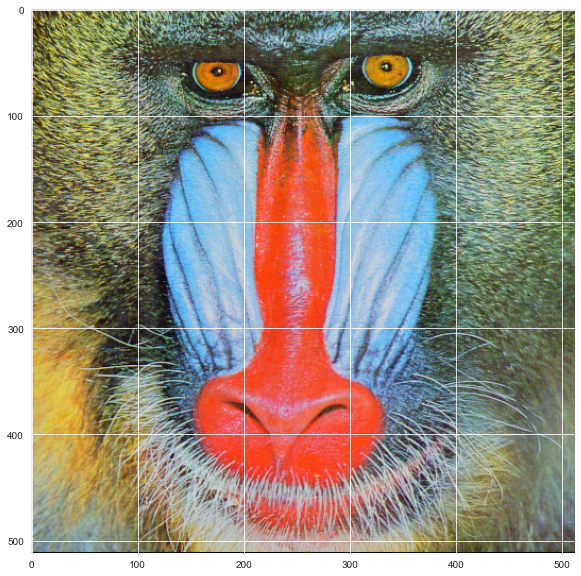

In [14]:
baboon = url_to_image('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

Question Four (b)

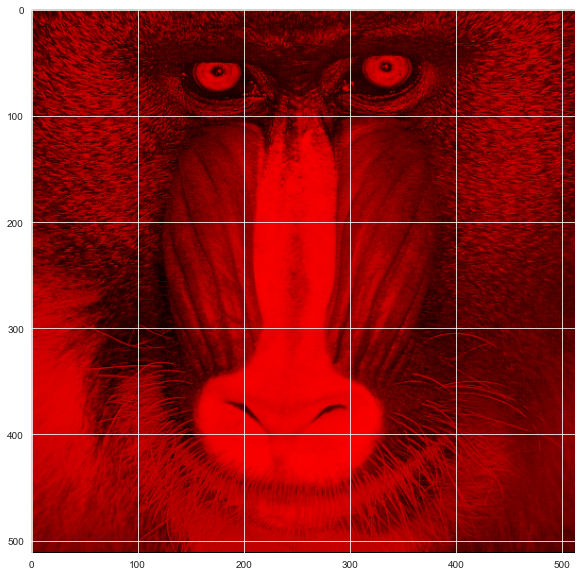

In [15]:
baboon_red = baboon.copy()
baboon_red[:,:,0]=0
baboon_red[:,:,1]=0

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(baboon_red, cv2.COLOR_BGR2RGB))
plt.show()

<h1> Question Five </h1>

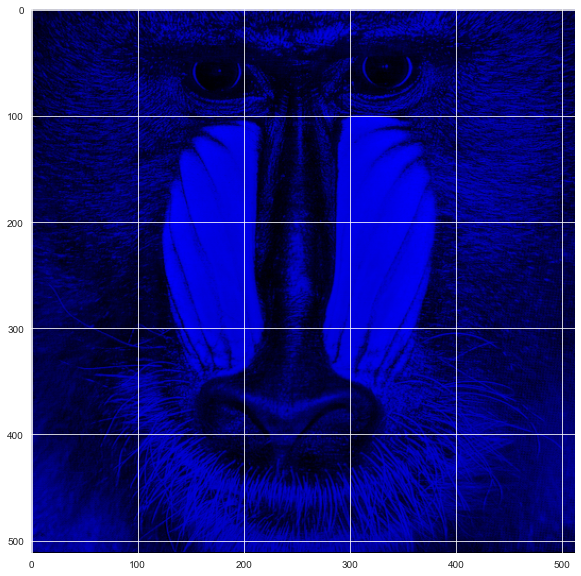

In [16]:
baboon_blue = baboon.copy()
baboon_blue[:,:,1]=0
baboon_blue[:,:,2]=0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.show()

(-0.5, 511.5, 511.5, -0.5)

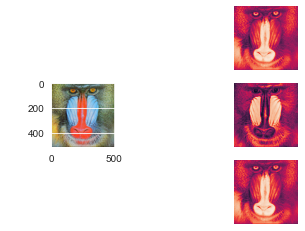

In [17]:
fig, ax = plt.subplots(3, 2)
ax[0,0].axis('off')
ax[2,0].axis('off')
ax[1,0].imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB),cmap='gray')
ax[1,0].axis('off')


ax[0,1].imshow(cv2.cvtColor(baboon_red, cv2.COLOR_BGR2GRAY))
ax[0,1].axis('off')

ax[1,1].imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2GRAY))
ax[1,1].axis('off')

ax[2,1].imshow(cv2.cvtColor(baboon_red, cv2.COLOR_BGR2GRAY))
ax[2,1].axis('off')

<h1>Section A</h1>

Question one (b)

Text(0.5, 1.0, 'Messi_smile')

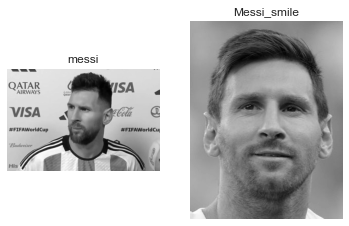

In [18]:
messi = url_to_image('https://phantom-marca.unidadeditorial.es/2ea6e12383f40dce693cb8c7d14081a3/resize/1320/f/jpg/assets/multimedia/imagenes/2022/12/10/16706269918207.jpg')

fig,ax = plt.subplots(1, 2)

ax[0].imshow(cv2.cvtColor(messi, cv2.COLOR_BGR2GRAY),cmap='gray')
ax[0].axis('off')
ax[0].set_title('messi')

messi_smile = url_to_image('https://img.a.transfermarkt.technology/portrait/big/28003-1631171950.jpg?lm=1')
ax[1].imshow(cv2.cvtColor(messi_smile, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[1].axis('off')
ax[1].set_title('Messi_smile')

(-0.5, 299.5, 389.5, -0.5)

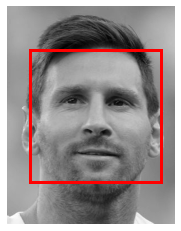

In [19]:
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)
##Convert frame to grayscale
messi_gray = cv2.cvtColor(messi_smile, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(
    messi_gray,
    scaleFactor=1.1,
    minNeighbors=6,
    minSize=(100, 100),
    flags=cv2.CASCADE_SCALE_IMAGE
)
# output of the classifier
faces
#visualize the outcome of the algorithm
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.imshow(messi_gray, cmap='gray')

# iterate over all the detected faces
for face in faces:
    # retrieve the coordinates of the position of the current face, and its size
    (x_smile, y_smile, w_smile, h_smile) = face
    # draw a rectangle where the face is detected
    ax.add_artist(Rectangle((x_smile, y_smile), w_smile, h_smile, fill=False, lw=3, color='red'))

ax.axis('off')